In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Data_Test.csv")

In [45]:
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [46]:
train.shape

(6019, 12)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [48]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [49]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [50]:
train.shape

(6019, 12)

In [51]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [52]:
print(train.Kilometers_Driven.min())
print(train.Kilometers_Driven.max())

171
6500000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f365be1bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f365b6ad3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f365be1b970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f365b6ada90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f365b6add90>],
 'means': []}

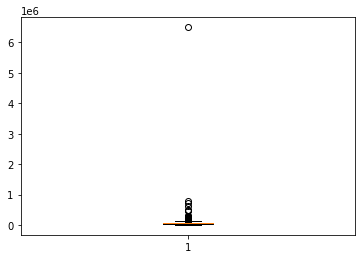

In [27]:
plt.boxplot(train.Kilometers_Driven)

In [53]:
train = train[train['Kilometers_Driven'] < 500000]
train = train[train['Kilometers_Driven'] > 1000]
train.shape
train.head()
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [54]:
train.Name = train.Name.str.split().str.get(0)
test.Name = test.Name.str.split().str.get(0)

In [55]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [56]:
train.Name.value_counts()

Maruti           1208
Hyundai          1104
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        313
Ford              299
Mahindra          272
BMW               266
Audi              236
Tata              184
Skoda             172
Renault           144
Chevrolet         121
Nissan             91
Land               60
Jaguar             39
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Ambassador          1
Isuzu               1
Smart               1
Lamborghini         1
Name: Name, dtype: int64

In [57]:
train = train[train['Name'] != 'Force']
train = train[train['Name'] != 'ISUZU']
train = train[train['Name'] != 'Bentley']
train = train[train['Name'] != 'Lamborghini']
train = train[train['Name'] != 'Isuzu']
train = train[train['Name'] != 'Smart']
train = train[train['Name'] != 'Ambassador']

In [58]:
train.shape

(5994, 12)

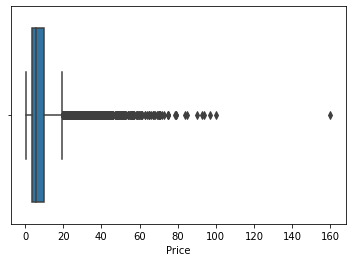

In [59]:
sns.boxplot(train.Price)

In [60]:
print(train.Price.min())
print(train.Price.max())

0.44
160.0


In [61]:
train = train[train.Price < 120]
train.shape

(5993, 12)

In [62]:
train = train[train.Price > 0.5]
train.shape

(5987, 12)

In [63]:
train.Mileage = train.Mileage.str.split().str.get(0).astype('float')
train.Engine = train.Engine.str.split().str.get(0).astype('int', errors='ignore')
train.Power = train.Power.str.split().str.get(0).astype('float', errors='ignore')
train.head()

test.Mileage = test.Mileage.str.split().str.get(0).astype('float')
test.Engine = test.Engine.str.split().str.get(0).astype('int', errors='ignore')
test.Power = test.Power.str.split().str.get(0).astype('float', errors='ignore')

In [64]:
train['Car_age'] = 2020 - train['Year']
test['Car_age'] = 2020 - test['Year']
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,10
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,5
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,8
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,7


In [65]:
train.Price = np.log1p(train.Price)

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [67]:
train['Name'] = label_encoder.fit_transform(train['Name'])
train['Location'] = label_encoder.fit_transform(train['Location'])
train['Fuel_Type'] = label_encoder.fit_transform(train['Fuel_Type'])
train['Transmission'] = label_encoder.fit_transform(train['Transmission'])
train['Owner_Type'] = label_encoder.fit_transform(train['Owner_Type'])


test['Name'] = label_encoder.fit_transform(test['Name'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Fuel_Type'] = label_encoder.fit_transform(test['Fuel_Type'])
test['Transmission'] = label_encoder.fit_transform(test['Transmission'])
test['Owner_Type'] = label_encoder.fit_transform(test['Owner_Type'])

train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,12,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.011601,10
1,7,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,2.602690,5
2,6,2,2011,46000,4,1,0,18.20,1199,88.7,5.0,1.704748,9
3,12,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,1.945910,8
4,0,3,2013,40670,1,0,2,15.20,1968,140.8,5.0,2.930660,7


In [89]:
train.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Car_age              0
dtype: int64

In [90]:
train.dtypes

Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_age                int64
dtype: object

In [99]:
train.Engine = pd.to_numeric(train.Engine, errors='coerce')
train.Power = pd.to_numeric(train.Power, errors='coerce')
test.Engine = pd.to_numeric(test.Engine, errors='coerce')
test.Power = pd.to_numeric(test.Power, errors='coerce')
import sklearn
print (sklearn.__version__)
# creating bool series True for NaN values  
bool_series = pd.isnull(train["Price"])  
    
# filtering data  
# displaying data only with Gender = NaN  
train.fillna(0) 



0.23.2


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,12,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.011601,10
1,7,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,2.602690,5
2,6,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,1.704748,9
3,12,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,1.945910,8
4,0,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,2.930660,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,12,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,1.749200,6
6015,7,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,1.609438,5
6016,11,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,1.360977,8
6017,12,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,1.294727,7


In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
train[["Engine", "Power", "Seats"]] = imputer.fit_transform(train[["Engine", "Power", "Seats"]])
test[["Engine", "Power", "Seats"]] = imputer.fit_transform(test[["Engine", "Power", "Seats"]])

In [101]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
dtype: int64

In [102]:
y = train.Price
X = train.drop(['Price'],axis=1)
print(train.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
dtype: int64


In [110]:
train.dropna(inplace=True)
print(train.isnull().sum())

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)
print(X_valid.isnull().sum())


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Car_age              0
dtype: int64


In [117]:
from sklearn.linear_model import LinearRegression


model1 = LinearRegression() 
print(X_train)
print(y_train)
model1.fit(X_train, y_train) 
print(X_valid)



      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
5804    18         7  2013              69140          1             1   
3270    12         7  2016              40810          1             1   
5532     7         3  2011              63991          4             1   
855     19         6  2009             100000          1             1   
3104    12         8  2013              41300          1             1   
...    ...       ...   ...                ...        ...           ...   
1028    13         4  2014              85000          1             0   
3442     7         4  2016              13460          4             1   
1385     6        10  2004             115000          4             1   
2707    12         7  2018              51921          1             1   
6018     2         5  2011              47000          1             1   

      Owner_Type  Mileage       Engine       Power    Seats  Car_age  
5804           0    20.46  1461.000000  

In [113]:
y_pred = model1.predict(X_valid) 
print(y_pred)


[1.52142252 1.69046127 1.62650076 ... 1.74210853 2.52595377 1.91515884]


In [114]:
import pickle

In [115]:
pickle.dump(model1, open('model.pkl','wb'))

In [116]:
model = pickle.load(open('model.pkl','rb'))

In [122]:
print(model.predict([[21,2,2012,48000,1,1,0,23.59,1364.0,64.05,5.0,8 ]])*100000)

[155929.29618744]
